In [20]:
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import date
import requests
from bs4 import BeautifulSoup
from IPython.display import HTML
requests.packages.urllib3.disable_warnings()
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [21]:
def get_data(url):
    # Setting up 'requests' to make HTTPS requests properly takes some extra steps... we'll skip them for now.
    requests.packages.urllib3.disable_warnings()

    snapshot_url = url
    snapshot = requests.get(snapshot_url)
    soup = BeautifulSoup(snapshot.content, 'html.parser')

    card_titles = soup.select('.Card-title')
    all_titles = [title.text for title in card_titles]

    card_times = soup.select('.Card-time')
    times = []
    for card in card_times:
        text = card.text
        if 'hour' in text or 'sec' in text or 'min' in text:
            times.append(datetime.today().strftime("%a, %b %dth %Y"))
        else:
            times.append(card.text)

    card_classes = soup.select('.Card-eyebrow')
    classes = [card.select_one('div').text for card in card_classes]
    classes = ['Top News', 'Top News', 'Top News', 'Top News', 'Top News'] + classes

    # Ensure all arrays have the same length
    min_length = min(len(all_titles), len(classes), len(times))
    all_titles = all_titles[:min_length]
    classes = classes[:min_length]
    times = times[:min_length]

    # Convert 'times' to pandas datetime for easy extraction of day and month
    times_pd = pd.to_datetime(times, errors='coerce')
    days = times_pd.day
    months = times_pd.month

    matrix = {'Title': all_titles, 'Date': times, 'Day': days, 'Month': months, 'Class': classes}
    df = pd.DataFrame(matrix)

    return df

In [4]:
df_finance = get_data('https://www.cnbc.com/finance/')
df_finance

,Title,Date,Day,Month,Class
0,Stocks making the biggest moves premarket: Rob...,"Wed, Mar 27th 2024",27,3,Top News
1,The UK is regulating crypto memes to curb scam...,"Wed, Mar 27th 2024",27,3,Top News
2,China's Xi meets U.S. executives as businesses...,"Wed, Mar 27th 2024",27,3,Top News
3,Stocks making the biggest moves after hours: G...,"Tue, Mar 26th 2024",26,3,Top News
4,Stocks making the biggest moves midday: Krispy...,"Tue, Mar 26th 2024",26,3,Top News
5,Nigeria's central bank hikes interest rate to ...,"Tue, Mar 26th 2024",26,3,Central Banks
6,Stocks making the biggest moves premarket: Kri...,"Tue, Mar 26th 2024",26,3,Market Insider
7,"Cocoa prices hit $10,000 per metric ton for th...","Tue, Mar 26th 2024",26,3,Markets
8,"Stocks making the biggest moves midday: DWAC, ...","Mon, Mar 25th 2024",25,3,Market Insider
9,Stocks making the biggest moves before the bel...,"Mon, Mar 25th 2024",25,3,Market Insider


In [5]:
df_health = get_data('https://www.cnbc.com/health-and-science/')
df_health

,Title,Date,Day,Month,Class
0,Moderna moves three vaccines into final stage ...,"Wed, Mar 27th 2024",27,3,Top News
1,"FDA approves Merck's drug for rare, deadly lun...","Tue, Mar 26th 2024",26,3,Top News
2,Healthy Returns: Drugmakers cap inhaler prices...,"Tue, Mar 26th 2024",26,3,Top News
3,Moderna says new Covid vaccine showed positive...,"Tue, Mar 26th 2024",26,3,Top News
4,Supreme Court signals it is likely to reject a...,"Tue, Mar 26th 2024",26,3,Top News
5,Viking Therapeutics stock jumps more than 15% ...,"Tue, Mar 26th 2024",26,3,Health and Science
6,Supreme Court weighs challenge to abortion pil...,"Tue, Mar 26th 2024",26,3,Politics
7,Nvidia's AI ambitions in medicine and health c...,"Sun, Mar 24th 2024",24,3,Technology Executive Council
8,Amgen wants to enter the weight loss drug mark...,"Mon, Mar 25th 2024",25,3,Health and Science
9,How much people are willing to spend on weight...,"Sat, Mar 23rd 2024",23,3,Health and Science


In [6]:
df_finance.to_csv('/content/drive/MyDrive/DataScience/Auditoriski/dataset_finance.csv', index=False)

In [7]:
df_health.to_csv('/content/drive/MyDrive/DataScience/Auditoriski/dataset_health.csv', index=False)

In [8]:
df_finance = pd.read_csv('/content/drive/MyDrive/DataScience/Auditoriski/dataset_finance.csv')

In [9]:
df_finance

,Title,Date,Day,Month,Class
0,Stocks making the biggest moves premarket: Rob...,"Wed, Mar 27th 2024",27,3,Top News
1,The UK is regulating crypto memes to curb scam...,"Wed, Mar 27th 2024",27,3,Top News
2,China's Xi meets U.S. executives as businesses...,"Wed, Mar 27th 2024",27,3,Top News
3,Stocks making the biggest moves after hours: G...,"Tue, Mar 26th 2024",26,3,Top News
4,Stocks making the biggest moves midday: Krispy...,"Tue, Mar 26th 2024",26,3,Top News
5,Nigeria's central bank hikes interest rate to ...,"Tue, Mar 26th 2024",26,3,Central Banks
6,Stocks making the biggest moves premarket: Kri...,"Tue, Mar 26th 2024",26,3,Market Insider
7,"Cocoa prices hit $10,000 per metric ton for th...","Tue, Mar 26th 2024",26,3,Markets
8,"Stocks making the biggest moves midday: DWAC, ...","Mon, Mar 25th 2024",25,3,Market Insider
9,Stocks making the biggest moves before the bel...,"Mon, Mar 25th 2024",25,3,Market Insider


In [10]:
df_finance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   33 non-null     object
 1   Date    33 non-null     object
 2   Day     33 non-null     int64 
 3   Month   33 non-null     int64 
 4   Class   33 non-null     object
dtypes: int64(2), object(3)
memory usage: 1.4+ KB


In [11]:
df_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   34 non-null     object
 1   Date    34 non-null     object
 2   Day     34 non-null     int64 
 3   Month   34 non-null     int64 
 4   Class   34 non-null     object
dtypes: int64(2), object(3)
memory usage: 1.5+ KB


In [12]:
df_finance.head()

,Title,Date,Day,Month,Class
0,Stocks making the biggest moves premarket: Rob...,"Wed, Mar 27th 2024",27,3,Top News
1,The UK is regulating crypto memes to curb scam...,"Wed, Mar 27th 2024",27,3,Top News
2,China's Xi meets U.S. executives as businesses...,"Wed, Mar 27th 2024",27,3,Top News
3,Stocks making the biggest moves after hours: G...,"Tue, Mar 26th 2024",26,3,Top News
4,Stocks making the biggest moves midday: Krispy...,"Tue, Mar 26th 2024",26,3,Top News


In [13]:
df_top_news = df_finance[df_finance['Class'] == 'Top News']

In [14]:
df_top_news

,Title,Date,Day,Month,Class
0,Stocks making the biggest moves premarket: Rob...,"Wed, Mar 27th 2024",27,3,Top News
1,The UK is regulating crypto memes to curb scam...,"Wed, Mar 27th 2024",27,3,Top News
2,China's Xi meets U.S. executives as businesses...,"Wed, Mar 27th 2024",27,3,Top News
3,Stocks making the biggest moves after hours: G...,"Tue, Mar 26th 2024",26,3,Top News
4,Stocks making the biggest moves midday: Krispy...,"Tue, Mar 26th 2024",26,3,Top News


In [15]:
df_top_news = pd.concat([df_finance[df_finance['Class'] == 'Top News'], df_health[df_health['Class'] == 'Top News']])

In [23]:
df_top_news

,Title,Date,Day,Month,Class
0,Stocks making the biggest moves premarket: Rob...,"Wed, Mar 27th 2024",27,3,Top News
1,The UK is regulating crypto memes to curb scam...,"Wed, Mar 27th 2024",27,3,Top News
2,China's Xi meets U.S. executives as businesses...,"Wed, Mar 27th 2024",27,3,Top News
3,Stocks making the biggest moves after hours: G...,"Tue, Mar 26th 2024",26,3,Top News
4,Stocks making the biggest moves midday: Krispy...,"Tue, Mar 26th 2024",26,3,Top News
0,Moderna moves three vaccines into final stage ...,"Wed, Mar 27th 2024",27,3,Top News
1,"FDA approves Merck's drug for rare, deadly lun...","Tue, Mar 26th 2024",26,3,Top News
2,Healthy Returns: Drugmakers cap inhaler prices...,"Tue, Mar 26th 2024",26,3,Top News
3,Moderna says new Covid vaccine showed positive...,"Tue, Mar 26th 2024",26,3,Top News
4,Supreme Court signals it is likely to reject a...,"Tue, Mar 26th 2024",26,3,Top News


In [29]:
df = pd.concat([df_finance, df_health])
df.to_csv('/content/drive/MyDrive/DataScience/Auditoriski/data_aud3.csv', index=False)
df = pd.read_csv('/content/drive/MyDrive/DataScience/Auditoriski/data_aud3.csv')
df

,Title,Date,Day,Month,Class
0,Stocks making the biggest moves premarket: Rob...,"Wed, Mar 27th 2024",27,3,Top News
1,The UK is regulating crypto memes to curb scam...,"Wed, Mar 27th 2024",27,3,Top News
2,China's Xi meets U.S. executives as businesses...,"Wed, Mar 27th 2024",27,3,Top News
3,Stocks making the biggest moves after hours: G...,"Tue, Mar 26th 2024",26,3,Top News
4,Stocks making the biggest moves midday: Krispy...,"Tue, Mar 26th 2024",26,3,Top News
...,...,...,...,...,...
62,Biden administration probing Change Healthcare...,"Wed, Mar 13th 2024",13,3,Tech
63,The news hitting a portfolio health-care name ...,"Wed, Mar 13th 2024",13,3,Morning Meeting
64,Healthy Returns: What’s next in Medicare drug ...,"Wed, Mar 13th 2024",13,3,Healthy Returns
65,Eli Lilly taps Amazon Pharmacy to help deliver...,"Wed, Mar 13th 2024",13,3,Health and Science


#EDA

In [26]:
df_health.median()

Day      19.0
Month     3.0
dtype: float64

In [27]:
df_finance.median()

Day      22.0
Month     3.0
dtype: float64

In [30]:
df.median()

Day      21.0
Month     3.0
dtype: float64

In [31]:
df.min()

Title    'Gray divorce' has doubled since the '90s. The...
Date                                    Fri, Mar 15th 2024
Day                                                     10
Month                                                    3
Class                                         Asia Markets
dtype: object

In [32]:
df.max()

Title    WeightWatchers CEO sends internal memo to empl...
Date                                    Wed, Mar 27th 2024
Day                                                     27
Month                                                    3
Class                                           Your Money
dtype: object

In [33]:
df.mean()

Day      21.089552
Month     3.000000
dtype: float64

In [34]:
df.std()

Day      4.284331
Month    0.000000
dtype: float64

In [35]:
df.quantile([.1,.25,.5,.75], axis=0)

,Day,Month
0.10,14.0,3.0
0.25,19.0,3.0
0.50,21.0,3.0
0.75,25.0,3.0


In [36]:
from scipy import stats

In [37]:
df.iloc[:5,:]

,Title,Date,Day,Month,Class
0,Stocks making the biggest moves premarket: Rob...,"Wed, Mar 27th 2024",27,3,Top News
1,The UK is regulating crypto memes to curb scam...,"Wed, Mar 27th 2024",27,3,Top News
2,China's Xi meets U.S. executives as businesses...,"Wed, Mar 27th 2024",27,3,Top News
3,Stocks making the biggest moves after hours: G...,"Tue, Mar 26th 2024",26,3,Top News
4,Stocks making the biggest moves midday: Krispy...,"Tue, Mar 26th 2024",26,3,Top News


In [38]:
df.iloc[:5,2:4]

,Day,Month
0,27,3
1,27,3
2,27,3
3,26,3
4,26,3


In [40]:
stats.gmean(df.iloc[:,2:4],axis=0)

array([20.60349789,  3.        ])

In [41]:
df.Class.value_counts()

Market Insider                  12
Top News                        10
Health and Science               8
Tech                             7
Federal Reserve                  4
Politics                         2
Morning Meeting                  2
Healthy Returns                  2
Homestretch                      2
Central Banks                    2
China Economy                    2
ETF Edge                         2
Markets                          2
Your Money                       1
Women and Wealth                 1
Technology Executive Council     1
Economy                          1
Trade Alerts                     1
CNBC Investigations              1
Asia Markets                     1
Crypto                           1
CNBC Changemakers                1
Private Equity                   1
Name: Class, dtype: int64

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22],
 [Text(0, 0, 'Top News'),
  Text(1, 0, 'Central Banks'),
  Text(2, 0, 'Market Insider'),
  Text(3, 0, 'Markets'),
  Text(4, 0, 'Crypto'),
  Text(5, 0, 'Asia Markets'),
  Text(6, 0, 'ETF Edge'),
  Text(7, 0, 'Women and Wealth'),
  Text(8, 0, 'Tech'),
  Text(9, 0, 'Your Money'),
  Text(10, 0, 'Politics'),
  Text(11, 0, 'China Economy'),
  Text(12, 0, 'Federal Reserve'),
  Text(13, 0, 'Health and Science'),
  Text(14, 0, 'Technology Executive Council'),
  Text(15, 0, 'Economy'),
  Text(16, 0, 'Trade Alerts'),
  Text(17, 0, 'CNBC Investigations'),
  Text(18, 0, 'Homestretch'),
  Text(19, 0, 'Healthy Returns'),
  Text(20, 0, 'Morning Meeting'),
  Text(21, 0, 'CNBC Changemakers'),
  Text(22, 0, 'Private Equity')])

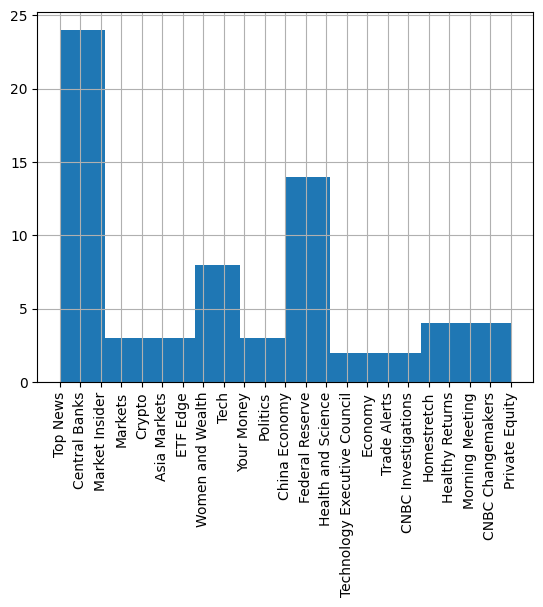

In [43]:
df['Class'].hist()
plt.xticks(rotation=90)

array([[<Axes: title={'center': 'Day'}>,
        <Axes: title={'center': 'Month'}>]], dtype=object)

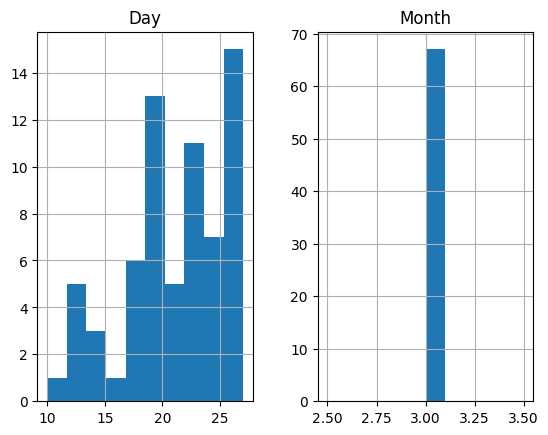

In [48]:
df.hist(bins=10)

<Axes: >

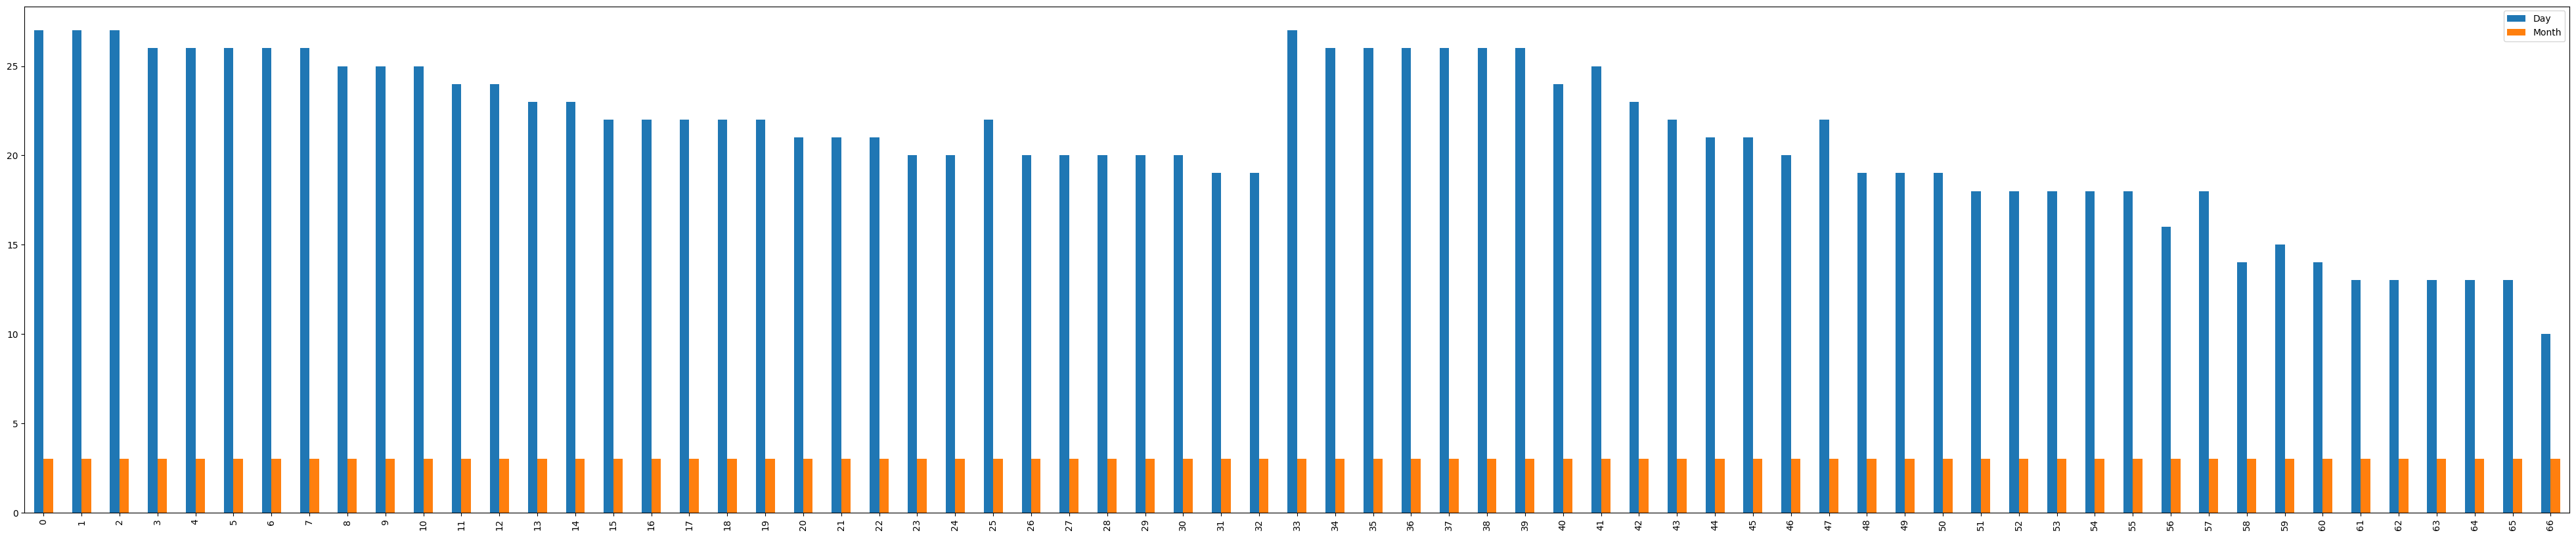

In [49]:
df.plot.bar(figsize=(50,10))

<Axes: >

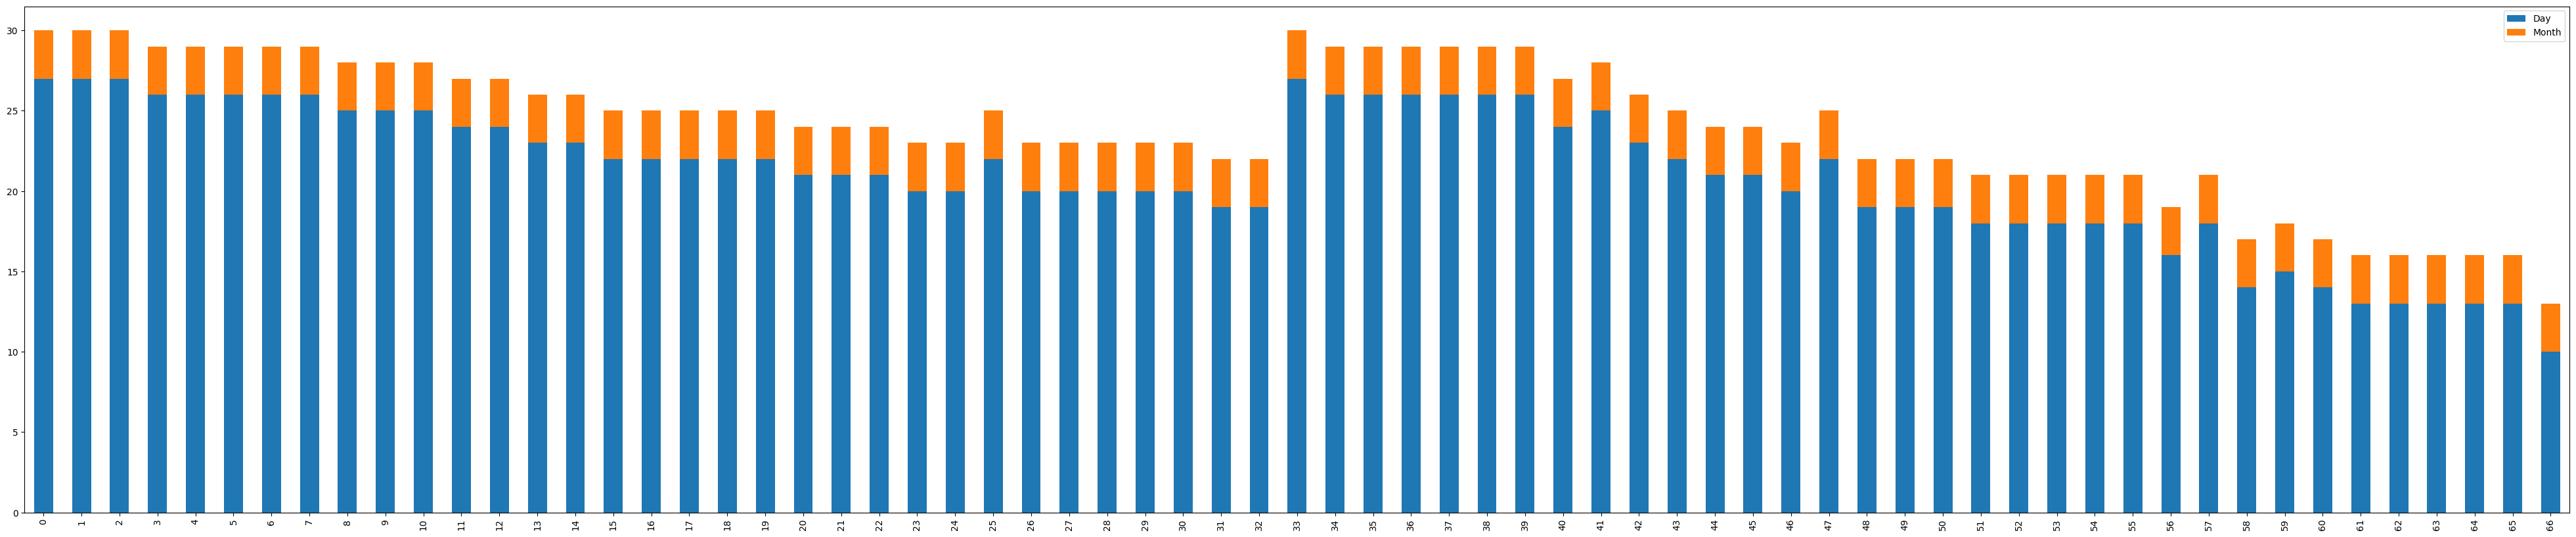

In [50]:
df.plot.bar(stacked=True,figsize=(50,10))

<Axes: >

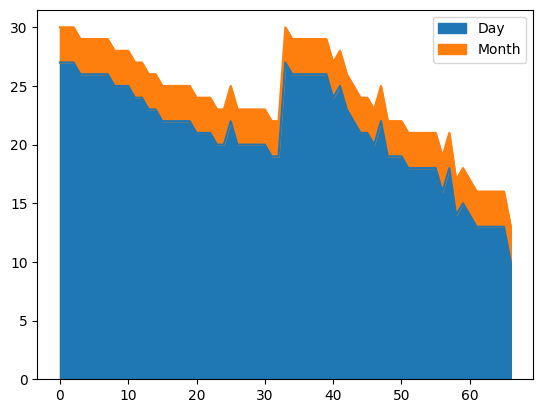

In [51]:
df.plot.area()

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22],
 [Text(0, 0, 'Top News'),
  Text(1, 0, 'Central Banks'),
  Text(2, 0, 'Market Insider'),
  Text(3, 0, 'Markets'),
  Text(4, 0, 'Crypto'),
  Text(5, 0, 'Asia Markets'),
  Text(6, 0, 'ETF Edge'),
  Text(7, 0, 'Women and Wealth'),
  Text(8, 0, 'Tech'),
  Text(9, 0, 'Your Money'),
  Text(10, 0, 'Politics'),
  Text(11, 0, 'China Economy'),
  Text(12, 0, 'Federal Reserve'),
  Text(13, 0, 'Health and Science'),
  Text(14, 0, 'Technology Executive Council'),
  Text(15, 0, 'Economy'),
  Text(16, 0, 'Trade Alerts'),
  Text(17, 0, 'CNBC Investigations'),
  Text(18, 0, 'Homestretch'),
  Text(19, 0, 'Healthy Returns'),
  Text(20, 0, 'Morning Meeting'),
  Text(21, 0, 'CNBC Changemakers'),
  Text(22, 0, 'Private Equity')])

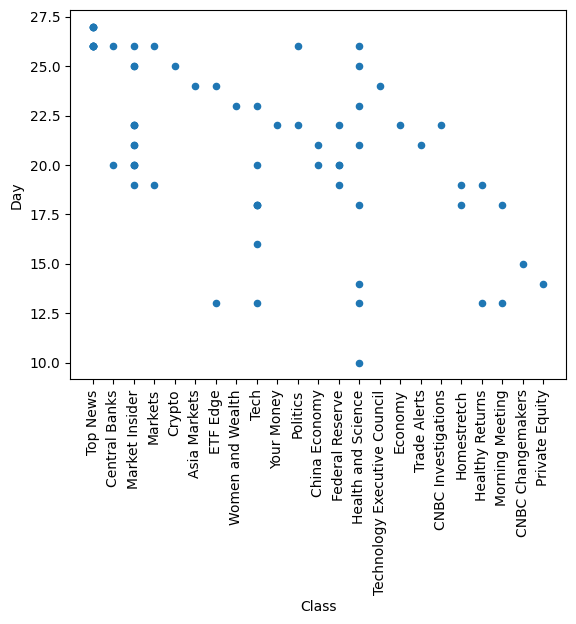

In [52]:
df.plot.scatter(x='Class',y='Day')
plt.xticks(rotation=90)

In [55]:
#df.groupby('Class').sum()

In [54]:
df.groupby('Class').sum().Day

Class
Asia Markets                     24
CNBC Changemakers                15
CNBC Investigations              22
Central Banks                    46
China Economy                    41
Crypto                           25
ETF Edge                         37
Economy                          22
Federal Reserve                  81
Health and Science              150
Healthy Returns                  32
Homestretch                      37
Market Insider                  263
Markets                          45
Morning Meeting                  31
Politics                         48
Private Equity                   14
Tech                            126
Technology Executive Council     24
Top News                        264
Trade Alerts                     21
Women and Wealth                 23
Your Money                       22
Name: Day, dtype: int64

In [56]:
df.groupby('Class').count().Day

Class
Asia Markets                     1
CNBC Changemakers                1
CNBC Investigations              1
Central Banks                    2
China Economy                    2
Crypto                           1
ETF Edge                         2
Economy                          1
Federal Reserve                  4
Health and Science               8
Healthy Returns                  2
Homestretch                      2
Market Insider                  12
Markets                          2
Morning Meeting                  2
Politics                         2
Private Equity                   1
Tech                             7
Technology Executive Council     1
Top News                        10
Trade Alerts                     1
Women and Wealth                 1
Your Money                       1
Name: Day, dtype: int64

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22],
 [Text(0, 0, 'Asia Markets'),
  Text(1, 0, 'CNBC Changemakers'),
  Text(2, 0, 'CNBC Investigations'),
  Text(3, 0, 'Central Banks'),
  Text(4, 0, 'China Economy'),
  Text(5, 0, 'Crypto'),
  Text(6, 0, 'ETF Edge'),
  Text(7, 0, 'Economy'),
  Text(8, 0, 'Federal Reserve'),
  Text(9, 0, 'Health and Science'),
  Text(10, 0, 'Healthy Returns'),
  Text(11, 0, 'Homestretch'),
  Text(12, 0, 'Market Insider'),
  Text(13, 0, 'Markets'),
  Text(14, 0, 'Morning Meeting'),
  Text(15, 0, 'Politics'),
  Text(16, 0, 'Private Equity'),
  Text(17, 0, 'Tech'),
  Text(18, 0, 'Technology Executive Council'),
  Text(19, 0, 'Top News'),
  Text(20, 0, 'Trade Alerts'),
  Text(21, 0, 'Women and Wealth'),
  Text(22, 0, 'Your Money')])

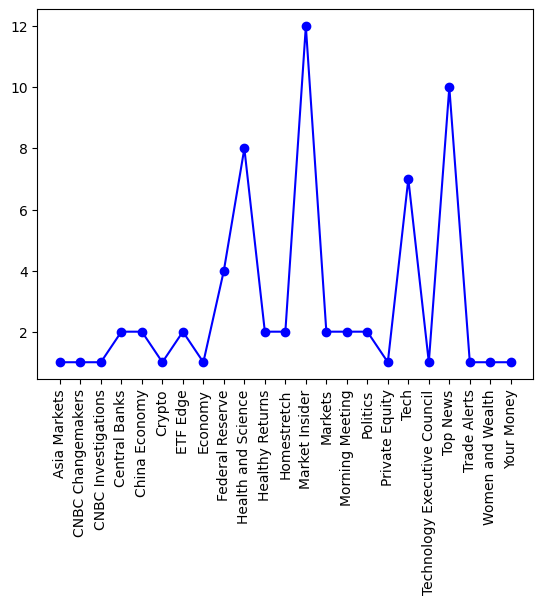

In [59]:
plt.plot(df.groupby('Class').count().Day,'-ob')
plt.xticks(rotation=90)

<Axes: >

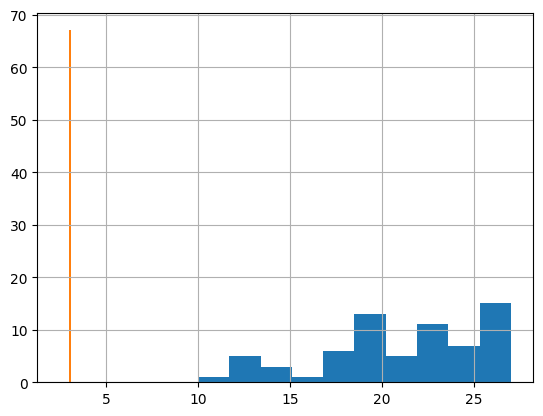

In [61]:
df['Day'].hist()
df['Month'].hist()

In [62]:
import seaborn as sns

<Axes: xlabel='Month'>

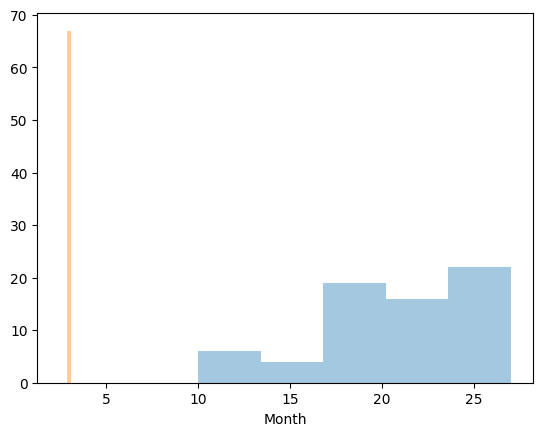

In [64]:
sns.distplot(df['Day'],bins=5,label='Day',kde=False)
sns.distplot(df['Month'],bins=5,label='Month',kde=False)

<Axes: xlabel='Month', ylabel='Density'>

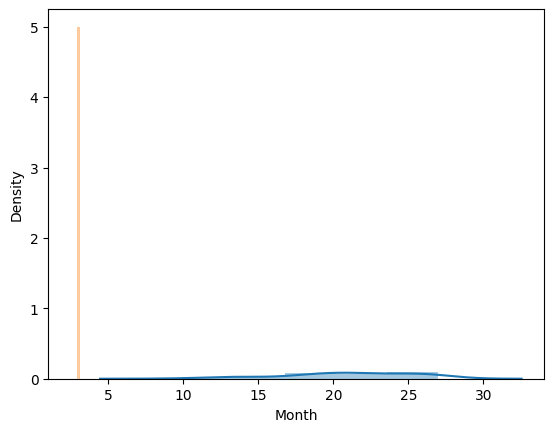

In [65]:
sns.distplot(df['Day'],bins=5,label='Day',kde=True)
sns.distplot(df['Month'],bins=5,label='Month',kde=True)

<Axes: >

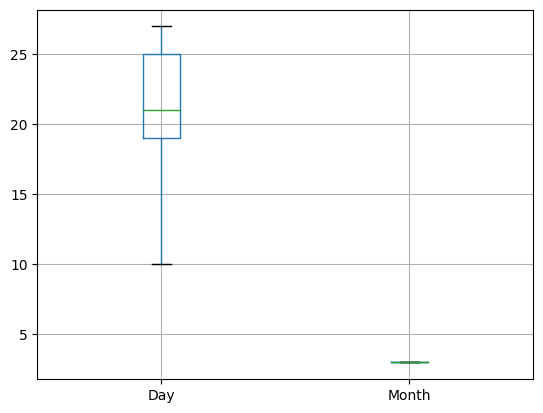

In [66]:
df.boxplot(column=['Day','Month'])

# Kaggle dataset visualization

In [68]:
import pandas as pd

In [69]:
train = pd.read_csv('/content/drive/MyDrive/DataScience/Auditoriski/train_data.csv')
test = pd.read_csv('/content/drive/MyDrive/DataScience/Auditoriski/test_data.csv')

In [71]:
train = train.drop(['case_id'],axis=1)
test = test.drop(['case_id'],axis=1)

In [72]:
train['dataset']='train'
test['dataset']='test'

In [75]:
df = pd.concat([train,test])
# df = df.drop(['case_id'],axis=1,inplace=True)
# inplace - da ne vrakja vrednost tuku da pravi vednas promena vo podatocnoto mnozestvo
df

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,dataset
0,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10,train
1,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50,train
2,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40,train
3,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50,train
4,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137052,11,b,2,Y,4,anesthesia,Q,D,3.0,41160,3.0,Emergency,Minor,4,41-50,6313.0,NaN,test
137053,25,e,1,X,2,radiotherapy,R,E,4.0,30985,7.0,Emergency,Moderate,2,0-10,3510.0,NaN,test
137054,30,c,3,Z,2,anesthesia,R,A,4.0,81811,12.0,Urgent,Minor,2,0-10,7190.0,NaN,test
137055,5,a,1,X,2,anesthesia,R,E,4.0,57021,10.0,Trauma,Minor,2,41-50,5435.0,NaN,test


<Axes: >

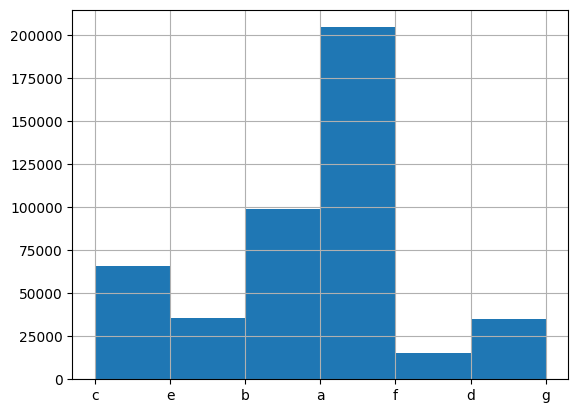

In [76]:
df['Hospital_type_code'].hist(bins=6)

<Axes: >

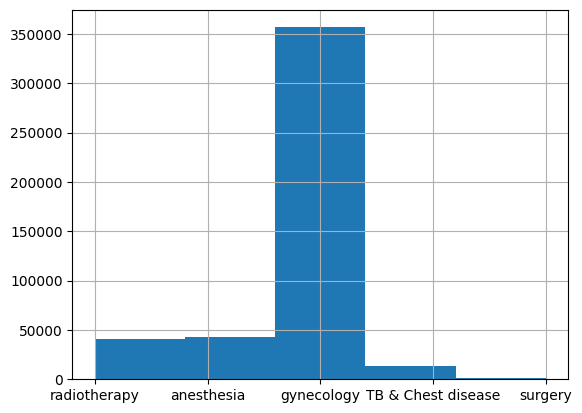

In [78]:
df['Department'].hist(bins=5)

In [79]:
import seaborn as sns

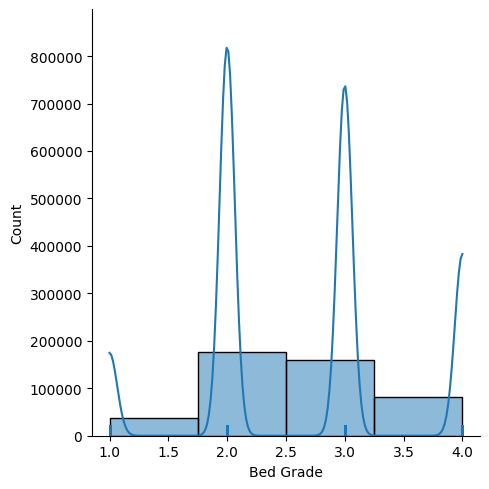

In [82]:
sns.displot(df['Bed Grade'], bins=4, kde=True, rug=True)

In [87]:
ds = df.groupby(['Department','Bed Grade']).count()['patientid'].reset_index()

In [89]:
ds.columns = ['Department','Bed Grade','count']

In [90]:
ds

,Department,Bed Grade,count
0,TB & Chest disease,1.0,773
1,TB & Chest disease,2.0,4880
2,TB & Chest disease,3.0,5151
3,TB & Chest disease,4.0,2944
4,anesthesia,1.0,452
5,anesthesia,2.0,10068
6,anesthesia,3.0,20163
7,anesthesia,4.0,11673
8,gynecology,1.0,32168
9,gynecology,2.0,144816


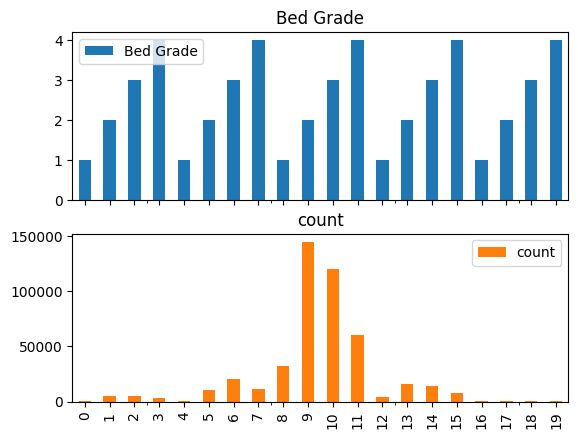

In [95]:
axes = ds.plot.bar(subplots=True)
axes[0].legend(loc=2)

In [96]:
import plotly.express as px

In [99]:
fig = px.bar(
    ds,
    x = 'Department',
    y = 'count',
    color = 'Bed Grade',
    title = 'Cases per department distribution',
    barmode = 'group'
)

In [100]:
fig.show()

<Axes: >

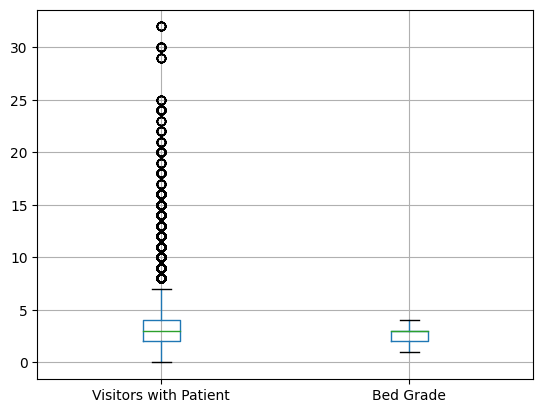

In [102]:
df.boxplot(column=['Visitors with Patient', 'Bed Grade'])

In [105]:
fig = px.box(
    df,
    y='Visitors with Patient',
)

In [106]:
fig.show()

In [108]:
fig = px.bar(
    ds,
    x='Department',
    y='count',
    color='Bed Grade',
    title='Cases per department distribution',
    barmode='group'
)

In [113]:
ds = df.groupby(['Department','Age']).count()['patientid'].reset_index()
ds.columns = ['Department','Age','count']
ds

,Department,Age,count
0,TB & Chest disease,0-10,602
1,TB & Chest disease,11-20,998
2,TB & Chest disease,21-30,1809
3,TB & Chest disease,31-40,2144
4,TB & Chest disease,41-50,2470
5,TB & Chest disease,51-60,2708
6,TB & Chest disease,61-70,1884
7,TB & Chest disease,71-80,964
8,TB & Chest disease,81-90,116
9,TB & Chest disease,91-100,56


In [114]:
fig = px.bar(
    ds,
    x='Department',
    y='count',
    color='Age',
    title='Cases per department distribution',
    barmode='group'
)

In [115]:
fig.show()

In [117]:
ds = df.groupby(['Age','dataset']).count()['patientid'].reset_index()
ds.columns = ['Age','dataset','count']
ds

,Age,dataset,count
0,0-10,test,2886
1,0-10,train,6254
2,11-20,test,7103
3,11-20,train,16768
4,21-30,test,17717
5,21-30,train,40843
6,31-40,test,26781
7,31-40,train,63639
8,41-50,test,27746
9,41-50,train,63749


In [118]:
fig = px.bar(
    ds,
    x='Age',
    y='count',
    color='dataset',
    title='Age distribution',
    barmode='group'
)

In [119]:
fig.show()

Dali grupata po godini zavisi kakva bolest ke ima

In [120]:
ds = df.groupby(['Age','Severity of Illness']).count()['patientid'].reset_index()
ds.columns = ['Age','Severity of Illness','count']
ds

,Age,Severity of Illness,count
0,0-10,Extreme,945
1,0-10,Minor,3728
2,0-10,Moderate,4467
3,11-20,Extreme,1897
4,11-20,Minor,11559
5,11-20,Moderate,10415
6,21-30,Extreme,6173
7,21-30,Minor,21923
8,21-30,Moderate,30464
9,31-40,Extreme,14453


In [121]:
fig = px.bar(
    ds,
    x='Age',
    y='count',
    color='Severity of Illness',
    title='Cases per age and severity of illness',
    barmode='group'
)

In [122]:
fig.show()